### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import os

### Import data

In [2]:
# read Input/Task1/rawMRData_Imag.npy
rawMRData_Imag = np.load('Input/Task1/rawMRData_Imag.npy')

# read Input/Task1/rawMRData_Real.npy
rawMRData_Real = np.load('Input/Task1/rawMRData_Real.npy')

### Task 1.1
![image](Input/Task1/task1_1.png)

- $k_i$, $k_j$ 는 각 k-space에서의 2차원 좌표를 의미할 것이고 l은 slice에 대한 데이터 확인할 수 있다.

In [3]:
print(f"rawMRData_Imag shape: {rawMRData_Imag.shape}")
print(f"rawMRData_Real shape: {rawMRData_Real.shape}")

rawMRData_Imag shape: (384, 512, 36)
rawMRData_Real shape: (384, 512, 36)


In [4]:
rawMRData = rawMRData_Real + 1j * rawMRData_Imag
print(f"rawMRData shape: {rawMRData.shape}")
print(f"rawMRData dtype: {rawMRData.dtype}")
print(f"rawMRData[0,0,0]: {rawMRData[0,0,0]}")

rawMRData shape: (384, 512, 36)
rawMRData dtype: complex128
rawMRData[0,0,0]: (-231+0j)


In [5]:
ind_l = 22
target_MRData = 20*np.abs(rawMRData[:,:,ind_l])

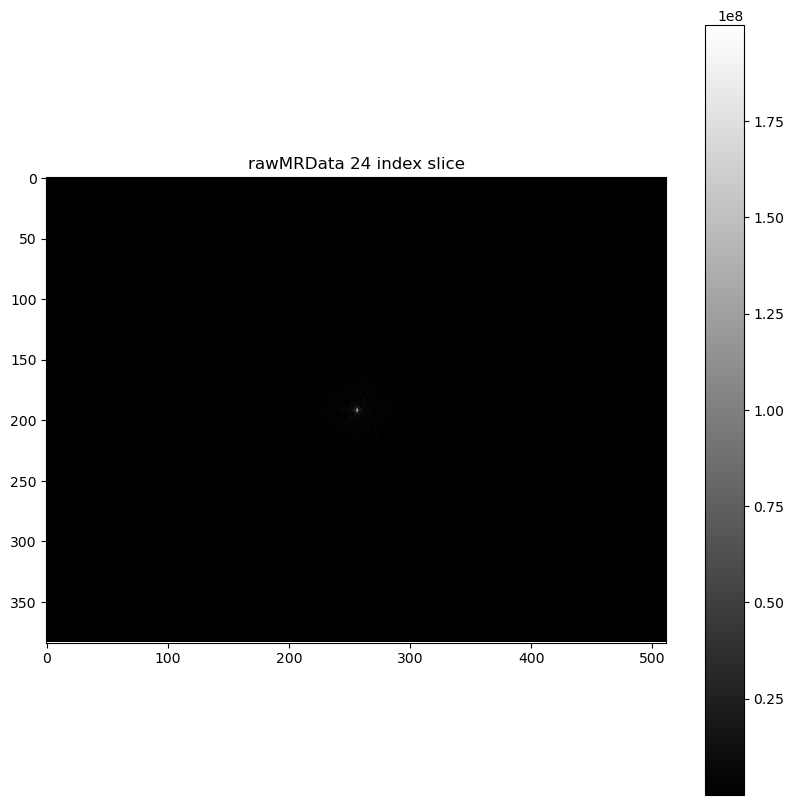

In [6]:
#plot target_MRData
plt.figure(figsize=(10,10))
plt.title('rawMRData 24 index slice')
plt.imshow(target_MRData, cmap='gray')
plt.colorbar()
plt.show()

### Task 1.2.
![image](Input/Task1/task1_2.png)

**생각) rawMRData를 x,y 좌표로 변환하는 것을 목표로 보임**
1. fftshift 적용
2. inverse 2D Fourier transform
3. 복소 내용에 대해서는 크기로 변환
4. dx, dy를 7.422 * 10**-1 로 간주해 하나를 노출

**FFTshift**
NumPy의 fftshift 함수 사용
- 주파수 도메인에서 FFT(고속 푸리에 변환) 결과를 시간 도메인으로 변환

fftshift 함수는 배열의 축을 따라 이동시키는데, 이동은 배열의 중앙을 기준으로 진행
- 2차원 배열의 경우, 배열의 첫 번째 절반은 마지막 행과 열로 이동하고, 끝 절반은 첫 번째 행과 열로 이동합니다.

이 코드에서는 rawMRData 배열을 (0,1) 축을 기준으로 이동시킵니다. 이는 2차원 배열에서 첫 번째 축(행)과 두 번째 축(열)을 기준으로 이동


- 기본적으로 fft를 수행한 결과물일 것이기 때문에, 영주파수 성분이 (0,0)에 위치하게되며, 실제로도 그러한것을 위해서 확인했다.
    - 이에, 영주파수 성분을 이미지의 중앙으로 옮기는 것이 타당하다.

In [7]:
# fftshift & inverse 2d ft
fftshift_rawMRData = np.zeros(rawMRData.shape, dtype=complex)
for i in range(rawMRData.shape[2]):
    fftshift_rawMRData_i = np.fft.fftshift(rawMRData[:,:,i])
    fftshift_rawMRData[:,:,i] = fftshift_rawMRData_i

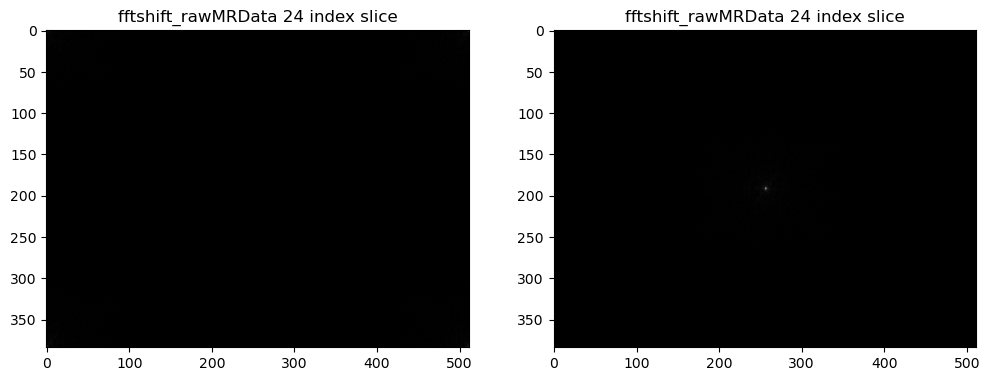

In [8]:
#plot fftshift_rawMRData
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('fftshift_rawMRData 24 index slice')
plt.imshow(np.abs(fftshift_rawMRData[:,:,ind_l]), cmap='gray')
plt.subplot(122)
plt.title('fftshift_rawMRData 24 index slice')
plt.imshow(target_MRData, cmap='gray')

In [9]:
# fftshift & inverse 2d ft
MRData_l = []
for i in range(rawMRData.shape[2]):
    MRData_i = np.abs(np.fft.ifft2(np.fft.fftshift(rawMRData[:,:,i])))
    MRData_l.append(MRData_i)
MRData = np.dstack(MRData_l)

In [10]:
print(f"MRData dtype: {MRData.dtype}")

MRData dtype: float64


In [11]:
dx = 7.422*10**(-2)
dy = 7.422*10**(-2)
x = dx*MRData.shape[1]
y = dy*MRData.shape[0]
print(f"x: {x}cm, y: {y}cm")

x: 38.00064cm, y: 28.500479999999996cm


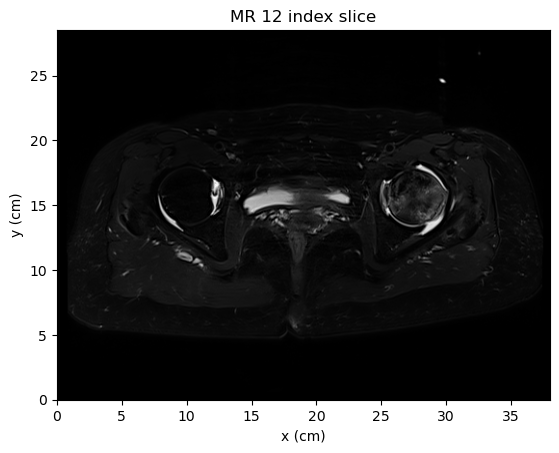

In [12]:
plt.title('MR 12 index slice')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.imshow(MRData[:,:,12], cmap='gray', extent=[0,x,0,y])

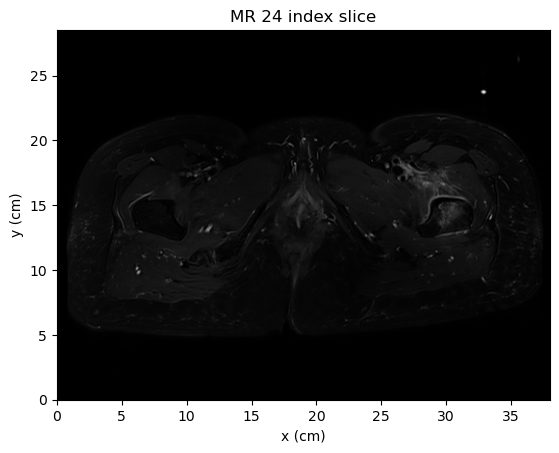

In [13]:
plt.title('MR 24 index slice')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.imshow(MRData[:,:,24], cmap='gray', extent=[0,x,0,y])

### Task 1.3
![image](Input/Task1/task1_3.png)

In [14]:
mr_slice_0 = pydicom.dcmread('Input/Task1/blind/000000.dcm')
mr_slice_1 = pydicom.dcmread('Input/Task1/blind/000001.dcm')
print(f"mr_slice_0 shape: {mr_slice_0.pixel_array.shape}")

mr_slice_0 shape: (384, 512)


In [15]:
mr_slice_0

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 226
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.115555597611170282812212243341817248873
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.9.4
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 9.4'
(0002, 0016) Source Application Entity Title     AE: 'MAROTECH'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'WATER', 'NORM', 'DIS2D', 'FM', 'FIL']
(0008, 0012) Instance Creation Date              DA: '20180528'
(0008, 0013) Instance Creation Time     

In [16]:
meta_data_atr_l = mr_slice_0.dir()
meta_data_dict = dict(zip(meta_data_atr_l, [getattr(mr_slice_0, atr) for atr in meta_data_atr_l]))

In [17]:
meta_data_atr_l

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionMatrix',
 'AcquisitionNumber',
 'AcquisitionTime',
 'AngioFlag',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ContentDate',
 'ContentTime',
 'DeviceSerialNumber',
 'EchoNumbers',
 'EchoTime',
 'EchoTrainLength',
 'FlipAngle',
 'FrameOfReferenceUID',
 'HighBit',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'ImagedNucleus',
 'ImagingFrequency',
 'InPlanePhaseEncodingDirection',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'InstanceNumber',
 'InstitutionAddress',
 'InstitutionName',
 'InstitutionalDepartmentName',
 'LargestImagePixelValue',
 'Laterality',
 'MRAcquisitionType',
 'MagneticFieldStrength',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'NumberOfAverages',
 'NumberOfPhaseEncodingSteps',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientPosition',
 'PatientSex',
 'PatientSize',
 'PatientWeight',
 'PercentPhaseFieldOfView',
 'PercentSampling

In [18]:
# get meta data dict with key containing 'Patient'
meta_data_dict_patient = {k: v for k, v in meta_data_dict.items() if 'Patient' in k}
meta_data_dict_patient

{'ImageOrientationPatient': [0.99849988464, 0.0505904583633, -0.0209424424677, -0.0506015523881, 0.9987189208661, 1.79566775E-07],
 'ImagePositionPatient': [-192.73852321101, -101.49106053552, 53.941851162488],
 'PatientAge': '057Y',
 'PatientBirthDate': '19610116',
 'PatientID': '000000000',
 'PatientName': 'XXX^XXX',
 'PatientPosition': 'HFS',
 'PatientSex': 'F',
 'PatientSize': '1.7',
 'PatientWeight': '80.0'}

- name의 가명처리를 확인할 수 있다.

In [19]:
dcm_path = 'Input/Task1/blind/'
dcm_file_l = os.listdir(dcm_path)
print(f"len(dcm_file_l): {len(dcm_file_l)}")
print(f"dcm_file_l[:5]: {dcm_file_l[:5]}")

len(dcm_file_l): 36
dcm_file_l[:5]: ['000000.dcm', '000001.dcm', '000003.dcm', '000002.dcm', '000004.dcm']


In [20]:
for ind, dcm_file in enumerate(dcm_file_l):
    dcm = pydicom.dcmread(dcm_path + dcm_file)
    if np.all(dcm.pixel_array == 0):
        print(f"processing {dcm_file} with index {ind}")
        dcm.PixelData = MRData[:,:,ind].astype(np.uint16).tobytes()  # 데이터 형식을 uint16로 변환
        dcm.Rows, dcm.Columns = MRData.shape[:2]  # Rows와 Columns 값을 업데이트
        dcm.save_as(dcm_path + dcm_file)

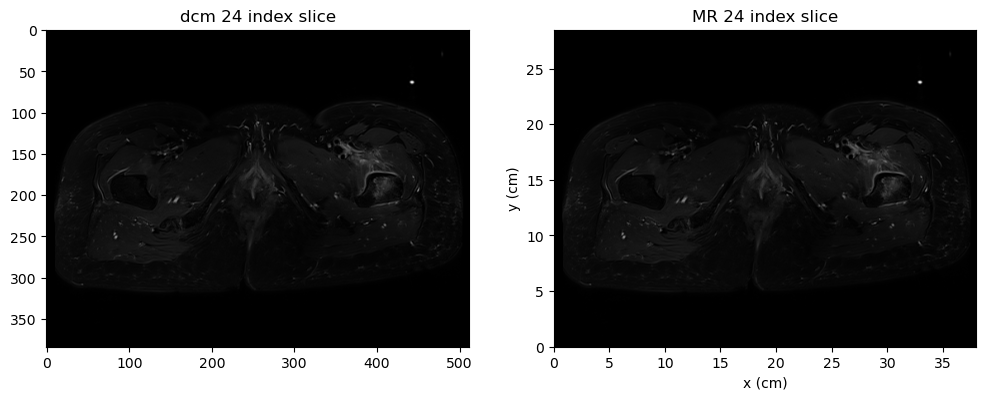

In [21]:
# draw dcm file's 24 index slice
plt.figure(figsize=(12,6))
plt.subplot(121)
dcm_24 = pydicom.dcmread(dcm_path + dcm_file_l[24])
plt.title('dcm 24 index slice')
plt.imshow(dcm_24.pixel_array, cmap='gray')
plt.subplot(122)
plt.title('MR 24 index slice')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.imshow(MRData[:,:,24], cmap='gray', extent=[0,x,0,y])
plt.show()

### 3d slice에 문제 없이 업로드된 모습
![img](Input/Task1/3dslice.png)